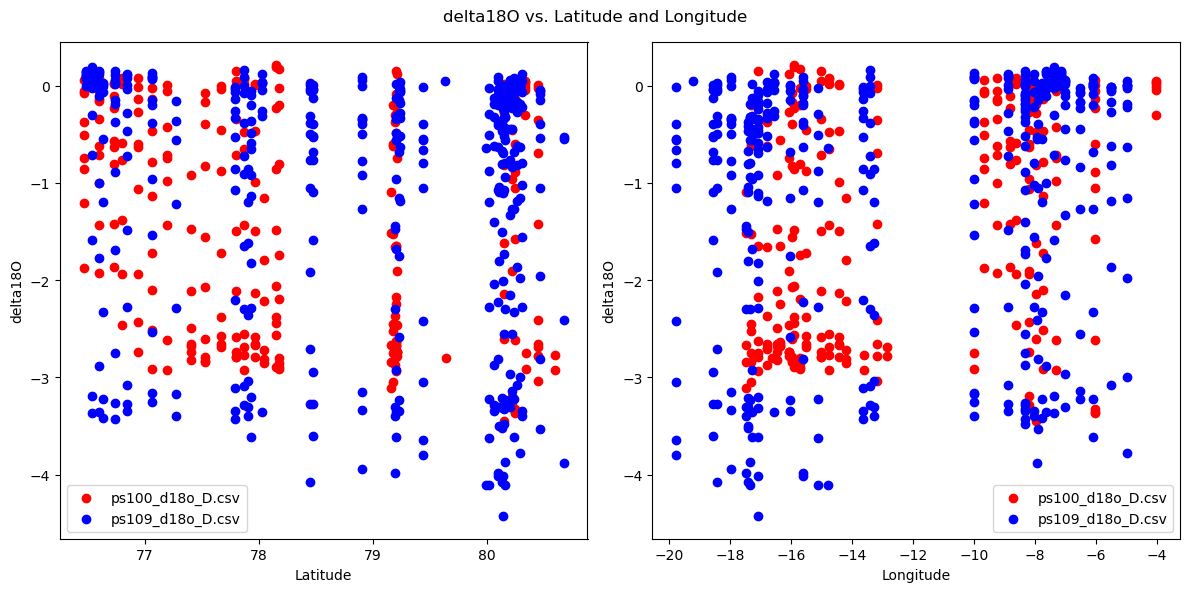

Plot saved as 'C:\CiASOM\PhD\07.Manuscripts\#1.Overview\paper\Revisions\Isotope data 79N glacier\side_by_side_plot.pdf'


In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the folder path
folder_path = r'C:\CiASOM\PhD\07.Manuscripts\#1.Overview\paper\Revisions\Isotope data 79N glacier'

# Define the file names and corresponding colors
file_info = {
    'ps100_d18o_D.csv': {'color': 'red'},
    'ps109_d18o_D.csv': {'color': 'blue'}
}

# Create a figure with two subplots arranged side by side
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Loop through the file names and plot "delta18O" against "Latitude" and "Longitude" for each dataset
for i, (file_name, info) in enumerate(file_info.items()):
    try:
        # Construct the full file path
        file_path = folder_path + '\\' + file_name

        # Read the data from the .csv file into a DataFrame
        df = pd.read_csv(file_path)

        # Plot "delta18O" against "Latitude" for the current dataset with the specified color
        axs[0].scatter(df['Latitude'], df['delta18O'], label=file_name, color=info['color'])
        axs[0].set_xlabel('Latitude')
        axs[0].set_ylabel('delta18O')
        axs[0].legend()

        # Plot "delta18O" against "Longitude" for the current dataset with the specified color
        axs[1].scatter(df['Longitude'], df['delta18O'], label=file_name, color=info['color'])
        axs[1].set_xlabel('Longitude')
        axs[1].set_ylabel('delta18O')
        axs[1].legend()

    except FileNotFoundError:
        print(f"File '{file_name}' not found.")
    except Exception as e:
        print(f"An error occurred while processing '{file_name}': {e}")

# Set common title
fig.suptitle('delta18O vs. Latitude and Longitude')

# Adjust the spacing between subplots
plt.tight_layout()

# Save the plot as a PDF file
pdf_file_path = r'C:\CiASOM\PhD\07.Manuscripts\#1.Overview\paper\Revisions\Isotope data 79N glacier\side_by_side_plot.pdf'
plt.savefig(pdf_file_path)

# Show the plots
plt.show()

# Display the saved PDF file path
print(f"Plot saved as '{pdf_file_path}'")


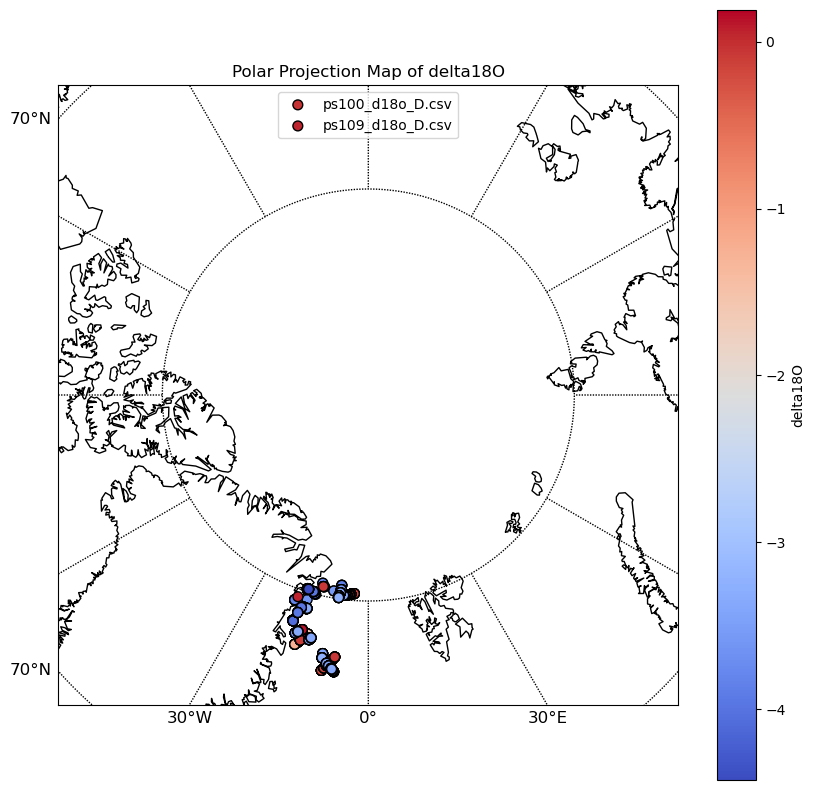

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the folder path
folder_path = r'C:\CiASOM\PhD\07.Manuscripts\#1.Overview\paper\Revisions\Isotope data 79N glacier'

# Define the file names and corresponding colors
file_info = {
    'ps100_d18o_D.csv': {'color': 'red'},
    'ps109_d18o_D.csv': {'color': 'blue'}
}

# Create a polar projection map of the world
fig = plt.figure(figsize=(10, 10))
m = Basemap(projection='npstere', boundinglat=75, lon_0=0, resolution='l')

# Loop through the file names and plot "delta18O" based on "Latitude" and "Longitude"
for file_name, info in file_info.items():
    try:
        # Construct the full file path
        file_path = folder_path + '\\' + file_name

        # Read the data from the .csv file into a DataFrame
        df = pd.read_csv(file_path)

        # Convert latitude and longitude to map coordinates
        x, y = m(df['Longitude'].values, df['Latitude'].values)

        # Plot "delta18O" as color-coded points
        m.scatter(x, y, c=df['delta18O'], cmap='coolwarm', label=file_name, s=50, edgecolors='k', zorder=3)

    except FileNotFoundError:
        print(f"File '{file_name}' not found.")
    except Exception as e:
        print(f"An error occurred while processing '{file_name}': {e}")

# Add map features
m.drawcoastlines()
m.drawparallels(range(60, 91, 10), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(range(0, 360, 30), labels=[0, 0, 0, 1], fontsize=12)

# Add a colorbar
cbar = plt.colorbar()
cbar.set_label('delta18O')

# Set title and legend
plt.title('Polar Projection Map of delta18O')
plt.legend()

# Show the map
plt.show()



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


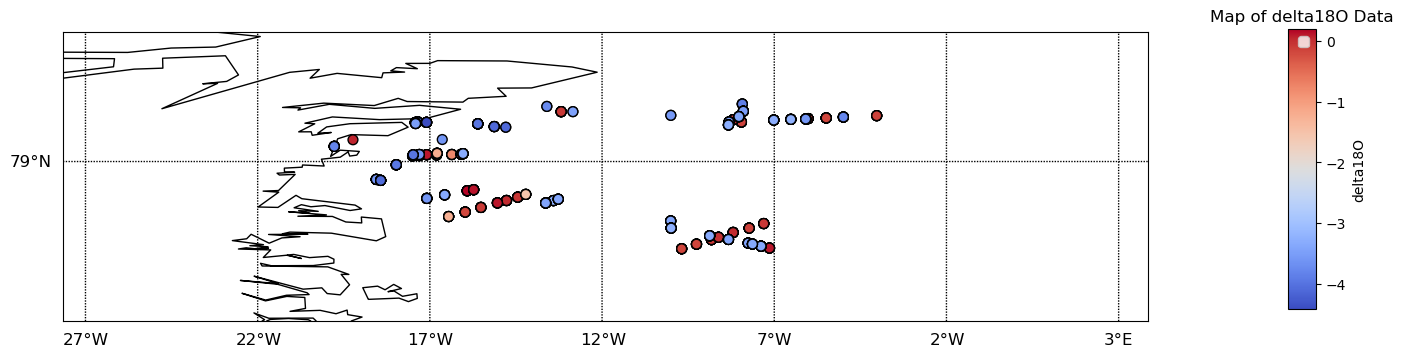

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

# Define the folder path
folder_path = r'C:\CiASOM\PhD\07.Manuscripts\#1.Overview\paper\Revisions\Isotope data 79N glacier'

# Define the file names and corresponding colors
file_info = {
    'ps100_d18o_D.csv': {'color': 'red'},
    'ps109_d18o_D.csv': {'color': 'blue'}
}

# Initialize variables for map extent
min_longitude = float('inf')
max_longitude = float('-inf')
min_latitude = float('inf')
max_latitude = float('-inf')

# Loop through the file names and determine map extent
for file_name, info in file_info.items():
    try:
        # Construct the full file path
        file_path = folder_path + '\\' + file_name

        # Read the data from the .csv file into a DataFrame
        df = pd.read_csv(file_path)

        # Update map extent based on data
        min_longitude = min(min_longitude, df['Longitude'].min())
        max_longitude = max(max_longitude, df['Longitude'].max())
        min_latitude = min(min_latitude, df['Latitude'].min())
        max_latitude = max(max_latitude, df['Latitude'].max())

    except FileNotFoundError:
        print(f"File '{file_name}' not found.")
    except Exception as e:
        print(f"An error occurred while processing '{file_name}': {e}")

# Expand the map extent by doubling the width and height
extent_padding = 2  # Factor to expand the extent
lon_center = (min_longitude + max_longitude) / 2
lat_center = (min_latitude + max_latitude) / 2
lon_width = max_longitude - min_longitude
lat_height = max_latitude - min_latitude
min_longitude = lon_center - (lon_width * extent_padding) / 2
max_longitude = lon_center + (lon_width * extent_padding) / 2
min_latitude = lat_center - (lat_height * extent_padding) / 2
max_latitude = lat_center + (lat_height * extent_padding) / 2

# Create a larger map with custom extent
fig = plt.figure(figsize=(14, 14))  # Adjust the figsize for a larger map
m = Basemap(projection='cyl', llcrnrlon=min_longitude, llcrnrlat=min_latitude, urcrnrlon=max_longitude, urcrnrlat=max_latitude, resolution='l')

# Loop through the file names and plot "delta18O" based on "Latitude" and "Longitude"
for file_name, info in file_info.items():
    try:
        # Construct the full file path
        file_path = folder_path + '\\' + file_name

        # Read the data from the .csv file into a DataFrame
        df = pd.read_csv(file_path)

        # Convert latitude and longitude to map coordinates
        x, y = m(df['Longitude'].values, df['Latitude'].values)

        # Plot "delta18O" as color-coded points
        m.scatter(x, y, c=df['delta18O'], cmap='coolwarm', label=file_name, s=50, edgecolors='k', zorder=3)

    except FileNotFoundError:
        print(f"File '{file_name}' not found.")
    except Exception as e:
        print(f"An error occurred while processing '{file_name}': {e}")

# Add map features
m.drawcoastlines()
m.drawcountries()
m.drawstates()
m.drawparallels(range(int(min_latitude), int(max_latitude) + 1, 5), labels=[1, 0, 0, 0], fontsize=12)
m.drawmeridians(range(int(min_longitude), int(max_longitude) + 1, 5), labels=[0, 0, 0, 1], fontsize=12)

# Add a colorbar with size adjusted to the map
cax = plt.axes([1, 0.4, 0.02, 0.2])  # Define the position and size of the colorbar
cbar = plt.colorbar(cax=cax)
cbar.set_label('delta18O')

# Move the legend to the best location
plt.legend(loc='best')

# Set title
plt.title('Map of delta18O Data')

# Show the map
plt.show()


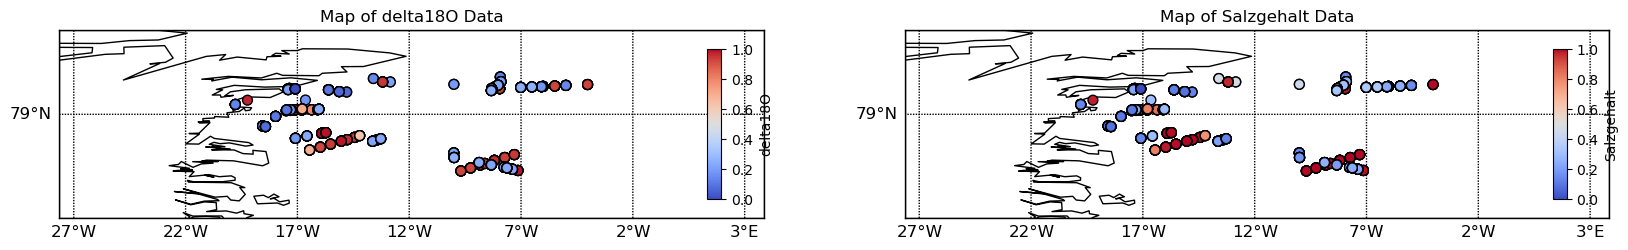

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib.cm import ScalarMappable

# Define the folder path
folder_path = r'C:\CiASOM\PhD\07.Manuscripts\#1.Overview\paper\Revisions\Isotope data 79N glacier'

# Define the file names and corresponding colors
file_info = {
    'ps100_d18o_D.csv': {'color': 'red'},
    'ps109_d18o_D.csv': {'color': 'blue'}
}

# Initialize variables for map extent for delta18O
min_longitude_delta18O = float('inf')
max_longitude_delta18O = float('-inf')
min_latitude_delta18O = float('inf')
max_latitude_delta18O = float('-inf')

# Initialize variables for map extent for Salzgehalt
min_longitude_Salzgehalt = float('inf')
max_longitude_Salzgehalt = float('-inf')
min_latitude_Salzgehalt = float('inf')
max_latitude_Salzgehalt = float('-inf')

# Loop through the file names and determine map extent for both datasets
for file_name, info in file_info.items():
    try:
        # Construct the full file path
        file_path = folder_path + '\\' + file_name

        # Read the data from the .csv file into a DataFrame
        df = pd.read_csv(file_path)

        # Update map extent for delta18O based on data
        min_longitude_delta18O = min(min_longitude_delta18O, df['Longitude'].min())
        max_longitude_delta18O = max(max_longitude_delta18O, df['Longitude'].max())
        min_latitude_delta18O = min(min_latitude_delta18O, df['Latitude'].min())
        max_latitude_delta18O = max(max_latitude_delta18O, df['Latitude'].max())

        # Update map extent for Salzgehalt based on data
        min_longitude_Salzgehalt = min(min_longitude_Salzgehalt, df['Longitude'].min())
        max_longitude_Salzgehalt = max(max_longitude_Salzgehalt, df['Longitude'].max())
        min_latitude_Salzgehalt = min(min_latitude_Salzgehalt, df['Latitude'].min())
        max_latitude_Salzgehalt = max(max_latitude_Salzgehalt, df['Latitude'].max())

    except FileNotFoundError:
        print(f"File '{file_name}' not found.")
    except Exception as e:
        print(f"An error occurred while processing '{file_name}': {e}")

# Expand the map extent by doubling the width and height for both datasets
extent_padding = 2  # Factor to expand the extent
lon_center_delta18O = (min_longitude_delta18O + max_longitude_delta18O) / 2
lat_center_delta18O = (min_latitude_delta18O + max_latitude_delta18O) / 2
lon_width_delta18O = max_longitude_delta18O - min_longitude_delta18O
lat_height_delta18O = max_latitude_delta18O - min_latitude_delta18O
min_longitude_delta18O = lon_center_delta18O - (lon_width_delta18O * extent_padding) / 2
max_longitude_delta18O = lon_center_delta18O + (lon_width_delta18O * extent_padding) / 2
min_latitude_delta18O = lat_center_delta18O - (lat_height_delta18O * extent_padding) / 2
max_latitude_delta18O = lat_center_delta18O + (lat_height_delta18O * extent_padding) / 2

lon_center_Salzgehalt = (min_longitude_Salzgehalt + max_longitude_Salzgehalt) / 2
lat_center_Salzgehalt = (min_latitude_Salzgehalt + max_latitude_Salzgehalt) / 2
lon_width_Salzgehalt = max_longitude_Salzgehalt - min_longitude_Salzgehalt
lat_height_Salzgehalt = max_latitude_Salzgehalt - min_latitude_Salzgehalt
min_longitude_Salzgehalt = lon_center_Salzgehalt - (lon_width_Salzgehalt * extent_padding) / 2
max_longitude_Salzgehalt = lon_center_Salzgehalt + (lon_width_Salzgehalt * extent_padding) / 2
min_latitude_Salzgehalt = lat_center_Salzgehalt - (lat_height_Salzgehalt * extent_padding) / 2
max_latitude_Salzgehalt = lat_center_Salzgehalt + (lat_height_Salzgehalt * extent_padding) / 2

# Create a figure with two subplots arranged side by side
fig, axs = plt.subplots(1, 2, figsize=(20, 10))  # Adjust the figsize for a larger map

# Create a Basemap for delta18O data with land colored as 20% grey
m_delta18O = Basemap(projection='cyl', llcrnrlon=min_longitude_delta18O, llcrnrlat=min_latitude_delta18O, urcrnrlon=max_longitude_delta18O, urcrnrlat=max_latitude_delta18O, resolution='l', ax=axs[0])
m_delta18O.drawmapboundary(fill_color='1')  # 20% grey for land color

# Create a Basemap for Salzgehalt data with land colored as 20% grey
m_Salzgehalt = Basemap(projection='cyl', llcrnrlon=min_longitude_Salzgehalt, llcrnrlat=min_latitude_Salzgehalt, urcrnrlon=max_longitude_Salzgehalt, urcrnrlat=max_latitude_Salzgehalt, resolution='l', ax=axs[1])
m_Salzgehalt.drawmapboundary(fill_color='1')  # 20% grey for land color

# Loop through the file names and plot "delta18O" based on "Latitude" and "Longitude" for the first map
for file_name, info in file_info.items():
    try:
        # Construct the full file path
        file_path = folder_path + '\\' + file_name

        # Read the data from the .csv file into a DataFrame
        df = pd.read_csv(file_path)

        # Convert latitude and longitude to map coordinates for delta18O data
        x_delta18O, y_delta18O = m_delta18O(df['Longitude'].values, df['Latitude'].values)

        # Plot "delta18O" as color-coded points on the first map
        sc = m_delta18O.scatter(x_delta18O, y_delta18O, c=df['delta18O'], cmap='coolwarm', label=file_name, s=50, edgecolors='k', zorder=3)

    except FileNotFoundError:
        print(f"File '{file_name}' not found.")
    except Exception as e:
        print(f"An error occurred while processing '{file_name}': {e}")

# Loop through the file names again and plot "Salzgehalt" based on "Latitude" and "Longitude" for the second map
for file_name, info in file_info.items():
    try:
        # Construct the full file path
        file_path = folder_path + '\\' + file_name

        # Read the data from the .csv file into a DataFrame
        df = pd.read_csv(file_path)

        # Convert latitude and longitude to map coordinates for Salzgehalt data
        x_Salzgehalt, y_Salzgehalt = m_Salzgehalt(df['Longitude'].values, df['Latitude'].values)

        # Plot "Salzgehalt" as color-coded points on the second map
        sc_Salzgehalt = m_Salzgehalt.scatter(x_Salzgehalt, y_Salzgehalt, c=df['Salzgehalt'], cmap='coolwarm', label=file_name, s=50, edgecolors='k', zorder=3)

    except FileNotFoundError:
        print(f"File '{file_name}' not found.")
    except Exception as e:
        print(f"An error occurred while processing '{file_name}': {e}")

# Add map features for both maps
m_delta18O.drawcoastlines(ax=axs[0])
m_delta18O.drawcountries(ax=axs[0])
m_delta18O.drawstates(ax=axs[0])
m_delta18O.drawparallels(range(int(min_latitude_delta18O), int(max_latitude_delta18O) + 1, 5), labels=[1, 0, 0, 0], fontsize=12, ax=axs[0])
m_delta18O.drawmeridians(range(int(min_longitude_delta18O), int(max_longitude_delta18O) + 1, 5), labels=[0, 0, 0, 1], fontsize=12, ax=axs[0])

m_Salzgehalt.drawcoastlines(ax=axs[1])
m_Salzgehalt.drawcountries(ax=axs[1])
m_Salzgehalt.drawstates(ax=axs[1])
m_Salzgehalt.drawparallels(range(int(min_latitude_Salzgehalt), int(max_latitude_Salzgehalt) + 1, 5), labels=[1, 0, 0, 0], fontsize=12, ax=axs[1])
m_Salzgehalt.drawmeridians(range(int(min_longitude_Salzgehalt), int(max_longitude_Salzgehalt) + 1, 5), labels=[0, 0, 0, 1], fontsize=12, ax=axs[1])

# Create a ScalarMappable for delta18O color scale
sm_delta18O = ScalarMappable(cmap='coolwarm')
sm_delta18O.set_array([])  # Set an empty array for now

# Create a ScalarMappable for Salzgehalt color scale
sm_Salzgehalt = ScalarMappable(cmap='coolwarm')
sm_Salzgehalt.set_array([])  # Set an empty array for now

# Add a colorbar for delta18O with size adjusted to the first map
cax_delta18O = axs[0].inset_axes([0.92, 0.1, 0.02, 0.8])  # Define the position and size of the colorbar for delta18O
cbar_delta18O = plt.colorbar(sm_delta18O, cax=cax_delta18O, ax=axs[0])
cbar_delta18O.set_label('delta18O')

# Add a colorbar for Salzgehalt with size adjusted to the second map
cax_Salzgehalt = axs[1].inset_axes([0.92, 0.1, 0.02, 0.8])  # Define the position and size of the colorbar for Salzgehalt
cbar_Salzgehalt = plt.colorbar(sm_Salzgehalt, cax=cax_Salzgehalt, ax=axs[1])
cbar_Salzgehalt.set_label('Salzgehalt')

# Move the legend for delta18O to the best location on the first map
#axs[0].legend(loc='best')

# Set titles for both maps
axs[0].set_title('Map of delta18O Data')
axs[1].set_title('Map of Salzgehalt Data')

# Show the maps
plt.show()

# Save the combined plot as a PDF file
#fig.savefig(r'C:\CiASOM\PhD\07.Manuscripts\#1.Overview\paper\Revisions\Isotope data 79N glacier/combined_maps.jpeg', bbox_inches='tight')
